#### Кафедра дискретной математики МФТИ

#### Курс математической статистики

Никита Волков

#### На основе http://www.inp.nsk.su/~grozin/python/

# Библиотека matplotlib

Есть несколько пакетов для построения графиков. Один из наиболее популярных - `matplotlib`. Если в `jupyter notebook` выполнить специальную `ipython` команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков - тогда их можно вертеть мышкой (в случае inline графиков это невозможно). Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`; конечно, растровые форматы годятся только для размещения графиков на web-страницах). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Некоторые функции отрисовки
<ul>
    <li>`plt.scatter(x, y, params)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси</li>
    <li>`plt.plot(x, y, params)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах.</li>
    <li>`plt.fill_between(x, y1, y2, params)` — закрасить пространство между $y_1$ и $y_2$ по координатам из $x$.</li>
    <li>`plt.pcolormesh(x1, x1, y, params)` — закрасить пространство в соответствии с интенсивностью $y$.</li>
    <li>`plt.contour(x1, x1, y, lines)` — нарисовать линии уровня. Затем нужно применить `plt.clabel`</li>
</ul>

Вспомогательные функции
<ul>
    <li>`plt.figure(figsize=(x, y))` — создать график размера $(x, y)$</li>
    <li>`plt.show()` — показать график.</li>
    <li>`plt.subplot(...)` — добавить подграфик</li>
    <li>`plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси</li>
    <li>`plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси</li>
    <li>`plt.title(name)` — установить имя графика</li>
    <li>`plt.xlabel(name)` — установить название горизонтальной оси</li>
    <li>`plt.ylabel(name)` — установить название вертикальной оси</li>
    <li>`plt.legend(loc=...)` — сделать легенду в позиции loc</li>
    <li>`plt.grid()` — добавить сетку на график</li>
    <li>`plt.savefig(filename)` — сохранить график в файл</li>
</ul>

http://matplotlib.org/gallery.html (англ.) — тысячи примеров

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой:

`plt.plot?`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Список $y$ координат; $x$ координаты образуют последовательность 0, 1, 2, ...

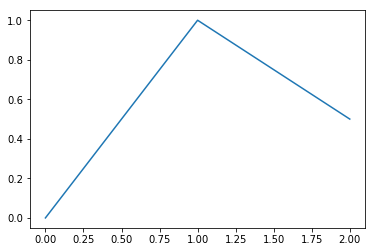

In [2]:
plt.figure()
plt.plot([0, 1, 0.5])
plt.show()

Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

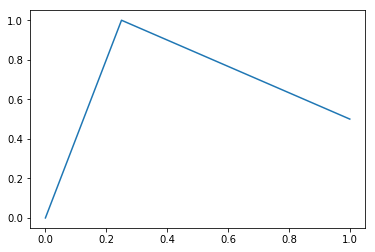

In [3]:
plt.figure()
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.show()

`scatter` просто рисует точки, не соединяя из линиями.

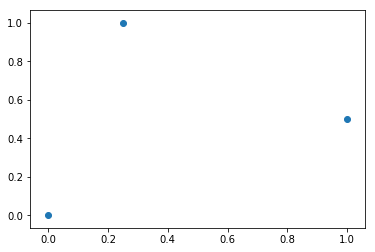

In [4]:
plt.figure()
plt.scatter([0, 0.25, 1], [0, 1, 0.5])
plt.show()

$x$ координаты не обязаны монотонно возрастать. Тут, например, мы строим замкнутый многоугольник.

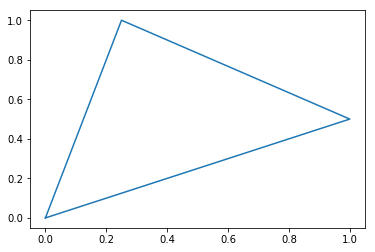

In [5]:
plt.figure()
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

Когда точек много, ломаная неотличима от гладкой кривой.

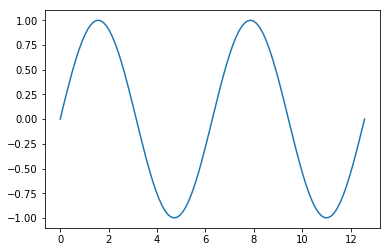

In [6]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

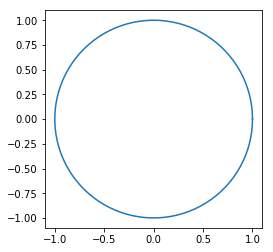

In [7]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.plot(np.cos(t), np.sin(t))
plt.axes().set_aspect(1)
plt.show()

Чтобы окружности выглядели как окружности, а не как эллипсы, (а квадраты как квадраты, а не как прямоугольники), нужно установить aspect ratio, равный 1.

А вот одна из фигур Лиссажу.

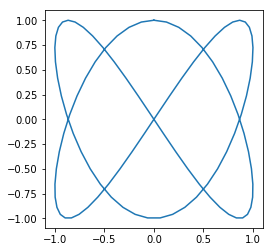

In [8]:
plt.figure()
plt.plot(np.sin(2 * t), np.cos(3 * t))
plt.axes().set_aspect(1)
plt.show()

Несколько кривых на одном графике. Каждая задаётся парой массивов - $x$ и $y$ координаты. По умолчанию, им присваиваются цвета из некоторой последовательности цветов; разумеется, их можно изменить.

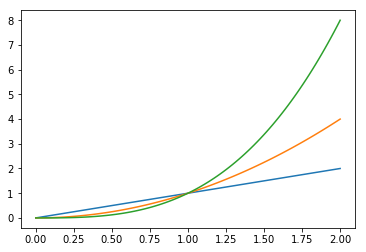

In [9]:
x = np.linspace(0, 2, 100)

plt.figure()
plt.plot(x, x, x, x**2, x, x**3)
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` - красный, `'b'` - синий и т.д.), дальше задаётся тип линии (`'-'` - сплошная, `'--'` - пунктирная, `'-.'` - штрих-пунктирная и т.д.).

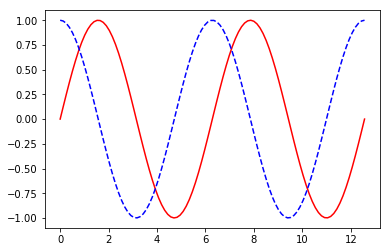

In [10]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x), 'r-')
plt.plot(x, np.cos(x), 'b--')
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

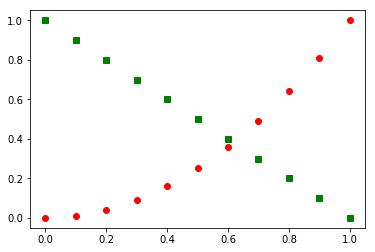

In [11]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x ** 2, 'ro')
plt.plot(x, 1 - x, 'gs')
plt.show()

Вот пример настройки почти всего, что можно настроить. Можно задать последовательность засечек на оси $x$ (и $y$) и подписи к ним (в них, как и в других текстах, можно использовать $\LaTeX$-овские обозначения). Задать подписи осей $x$ и $y$ и заголовок графика. Во всех текстовых элементах можно задать размер шрифта. Можно задать толщину линий и штрихи (так, на графике косинуса рисуется штрих длины 8, потом участок длины 4 не рисуется, потом участок длины 2 рисуется, потом участок длины 4 опять не рисуется, и так по циклу; поскольку толщина линии равна 2, эти короткие штрихи длины 2 фактически выглядят как точки). Можно задать подписи к кривым (legend); где разместить эти подписи тоже можно регулировать.

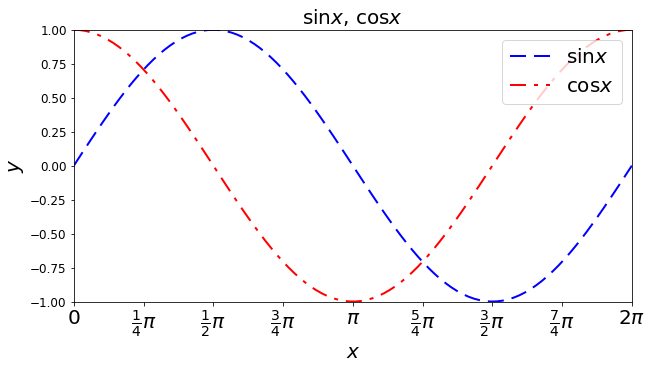

In [12]:
x = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, np.sin(x), linewidth=2, color='b', dashes=[8, 4], label=r'$\sin x$')
plt.plot(x, np.cos(x), linewidth=2, color='r', dashes=[8, 4, 2, 4], label=r'$\cos x$')
plt.axis([0, 2 * np.pi, -1, 1])
plt.xticks(np.linspace(0, 2 * np.pi, 9),  # Где сделать отметки
           ('0',r'$\frac{1}{4}\pi$',r'$\frac{1}{2}\pi$',  # Как подписать
            r'$\frac{3}{4}\pi$',r'$\pi$',r'$\frac{5}{4}\pi$',
            r'$\frac{3}{2}\pi$',r'$\frac{7}{4}\pi$',r'$2\pi$'),
           fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.title(r'$\sin x$, $\cos x$', fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()

Если `linestyle=''`, то точки не соединяются линиями. Сами точки рисуются маркерами разных типов. Тип определяется строкой из одного символа, который чем-то похож на нужный маркер. В добавок к стандартным маркерам, можно определить самодельные.

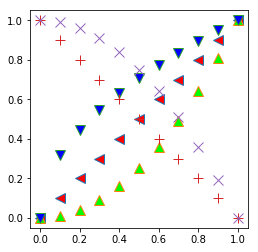

In [13]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x, linestyle='', marker='<', markersize=10, markerfacecolor='#FF0000')
plt.plot(x, x ** 2, linestyle='', marker='^', markersize=10,markerfacecolor='#00FF00')
plt.plot(x, x ** (1/2), linestyle='', marker='v', markersize=10, markerfacecolor='#0000FF')
plt.plot(x, 1 - x, linestyle='', marker='+', markersize=10, markerfacecolor='#0F0F00')
plt.plot(x, 1 - x ** 2, linestyle='', marker='x', markersize=10, markerfacecolor='#0F000F')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.axes().set_aspect(1)
plt.show()

## Логарифмический масштаб

Если $y$ меняется на много порядков, то удобно использовать логарифмический масштаб по $y$.

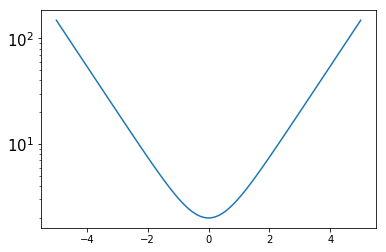

In [14]:
x = np.linspace(-5, 5, 100)

plt.figure()
plt.plot(x, np.exp(x) + np.exp(-x))
plt.yscale('log')
plt.yticks(fontsize=15)
plt.show()

Можно задать логарифмический масштаб по обоим осям.

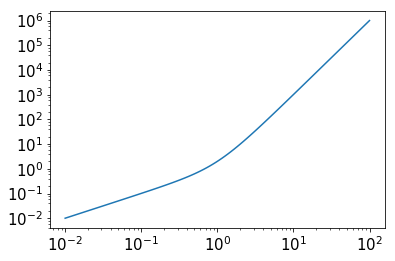

In [15]:
x = np.logspace(-2, 2, 100)

plt.figure()
plt.plot(x, x + x ** 3)
plt.xscale('log'), plt.xticks(fontsize=15)
plt.yscale('log'), plt.yticks(fontsize=15)
plt.show()

## Полярные координаты

Первый массив - $\varphi$, второй - $r$. Вот спираль.

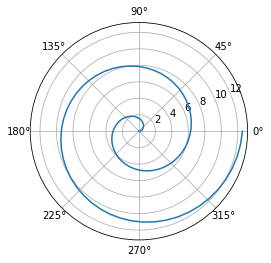

In [16]:
t = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.polar(t, t)
plt.show()

А это угловое распределение пионов в $e^+ e^-$ аннигиляции.

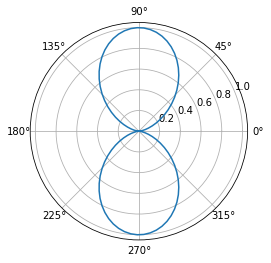

In [17]:
phi = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.polar(phi, np.sin(phi) ** 2)
plt.show()

## Экпериментальные данные

Сгенерируем выборку из стандартного нормального распределения.
Нанесем на график точки выборки.

In [18]:
import scipy.stats as sps

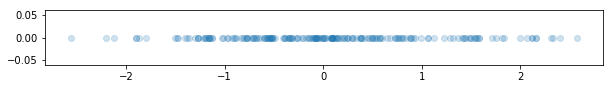

In [19]:
sample = sps.norm.rvs(size=200)

plt.figure(figsize=(10, 1))
plt.scatter(sample, np.zeros(200), alpha=0.2)  # alpha - прозрачность точки
plt.show()

Можно добавить график плотности

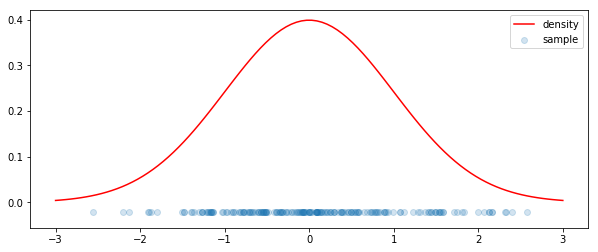

In [20]:
grid = np.linspace(-3, 3, 100)  # задаем сетку для построения графика плотности

plt.figure(figsize=(10, 4))
plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.2, label='sample')  # label - описание в легенде
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')  # color - цвет графика
plt.legend()  # добавляет легенду
plt.show()

Нарисуем гистограмму

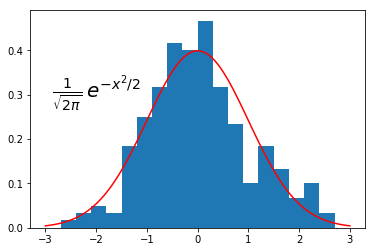

In [21]:
plt.figure()
n, bins, patches = plt.hist(sample, range=(-3, 3), bins=20, normed=True)  # normed - нормированный
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')  # color - цвет графика
plt.text(-2, 0.3, r'$\frac{1}{\sqrt{2\pi}}\,e^{-x^2/2}$',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.show()

Предположим, что выборка приходит постепенно.
Для каждого момента времени посчитаем выборочное среднее и доверительный интервал.
Нанесем их на график.

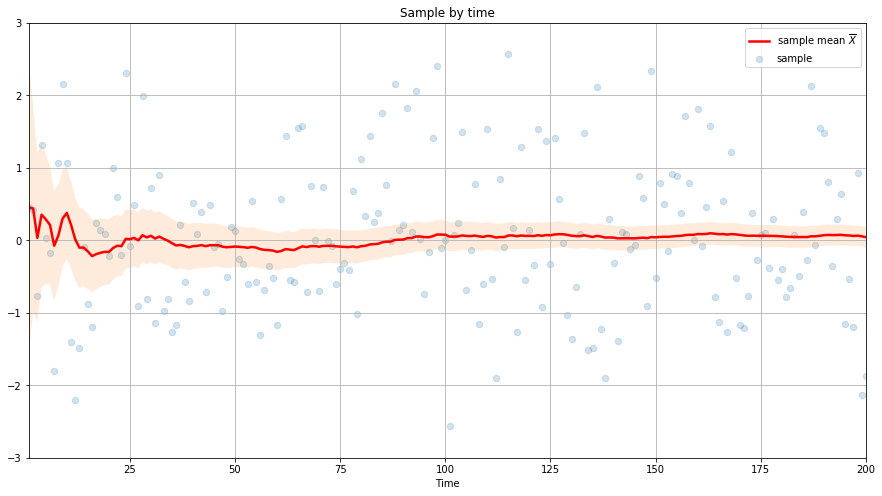

In [22]:
time = np.arange(1, 201)
means = sample.cumsum() / np.arange(1, 201)

plt.figure(figsize=(15, 8))
plt.scatter(time, sample, alpha=0.2, s=40, label='sample')  # s - размер точек
plt.plot(time, means, color='red', linewidth=2.5, label='sample mean $\overline{X}$')  # linewidth - толщина линии
# заполняет пространство между двумя функциями
plt.fill_between(time, means + 2 / np.sqrt(time), means - 2 / np.sqrt(time), alpha=0.15)
plt.legend()
plt.xlim((1, 200))  # размеры графика по горизонтальной оси (ставим None, если по стороне ограничений нет)
plt.ylim((-3, 3))  # размеры графика по вертикальной оси 
plt.xlabel('Time')  # название горизонтальной оси (аналогично plt.ylabel)
plt.title('Sample by time')  # имя графика
plt.grid()  # добавляем сетку
plt.savefig('example.png')  # сохранение в файл
plt.show()

Посмотрим еще на то, как можно закрашивать график в соответствии с какой-то функцией.
Для примера возьмем плотность распределения $\mathscr{N} \left( \begin{pmatrix} 0 \\ 0 \end{pmatrix},  \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix} \right)$.

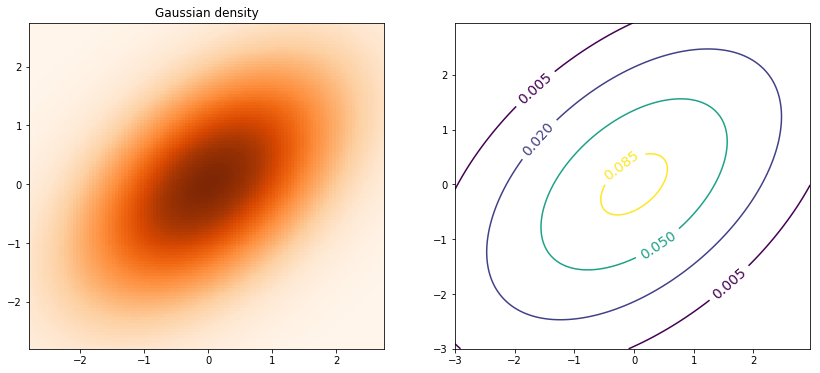

In [23]:
grid = np.mgrid[-3:3:0.05, -3:3:0.05]
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=[0, 0], cov=[[2, 1], [1, 2]])
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[0].shape[1])])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')  # закрасить с интенсивностью density, cmap - цветовая схема
plt.xlim((np.min(grid[0]) + 0.2, np.max(grid[0]) - 0.2))
plt.ylim((np.min(grid[1]) + 0.2, np.max(grid[1]) - 0.2))
plt.title('Gaussian density')

plt.subplot(1, 2, 2)
CS = plt.contour(grid[0], grid[1], density, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
plt.xlim((np.min(grid[0]), np.max(grid[0])))
plt.ylim((np.min(grid[1]), np.max(grid[1])))
    
plt.show()

## Контурные графики

Пусть мы хотим изучить поверхность $z=xy$. Вот её горизонтали.

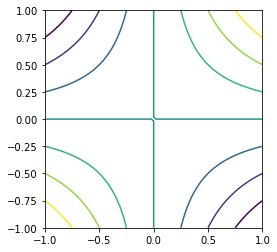

In [24]:
x = np.linspace(-1, 1, 50)
y = x
z = np.outer(x, y)

plt.figure()
plt.contour(x, y, z)
plt.axes().set_aspect(1)
plt.show()

Что-то их маловато. Сделаем побольше и подпишем.

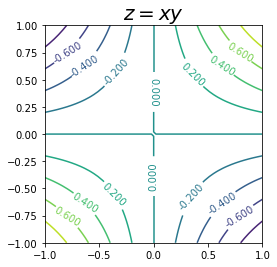

In [25]:
plt.figure()
curves = plt.contour(x, y, z, np.linspace(-1, 1, 11))
plt.clabel(curves)
plt.axes().set_aspect(1)
plt.title(r'$z=xy$', fontsize=20)
plt.show()

А здесь высота даётся цветом, как на физических географических картах. `colorbar` показывает соответствие цветов и значений $z$.

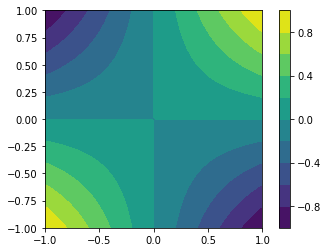

In [26]:
plt.figure()
plt.contourf(x, y, z, np.linspace(-1, 1, 11))
plt.colorbar()
plt.axes().set_aspect(1)
plt.show()

## Images (пиксельные картинки)

Картинка задаётся массивом `z`: `z[i,j]` - это цвет пикселя `i,j`, массив из 3 элементов (`rgb`, числа от 0 до 1).

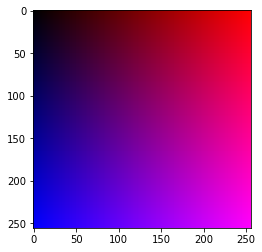

In [27]:
n = 256
u = np.linspace(0, 1, n)
x, y = np.meshgrid(u, u)
z = np.zeros((n, n, 3))
z[:, :, 0] = x
z[:, :, 2] = y

plt.figure()
plt.imshow(z)
plt.show()

Можно загрузить картинку из файла.
Это будет обычный `numpy.array`.
Размерность картинки $280 x 280$.
По последней координате цвета RGB и прозрачность.

<class 'numpy.ndarray'> (280, 280, 4)


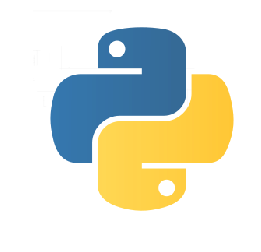

In [28]:
picture = plt.imread('python.png')
print(type(picture), picture.shape)

plt.imshow(picture)
plt.axis('off')
plt.show()

## Трёхмерная линия

Задаётся параметрически: $x=x(t)$, $y=y(t)$, $z=z(t)$.

In [29]:
t = np.linspace(0, 4 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = t / (4 * np.pi)

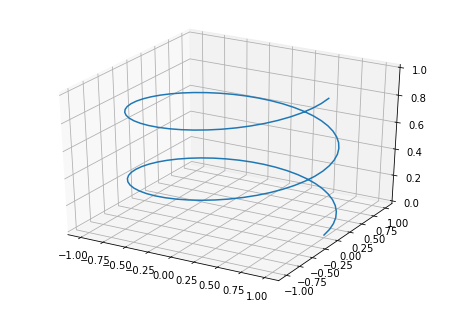

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z)
plt.show()

К сожалению, inline трёхмерную картинку нельзя вертеть мышкой (это можно делать с трёхмерными картинками в отдельных окнах). Но можно задать, с какой стороны мы смотрим.

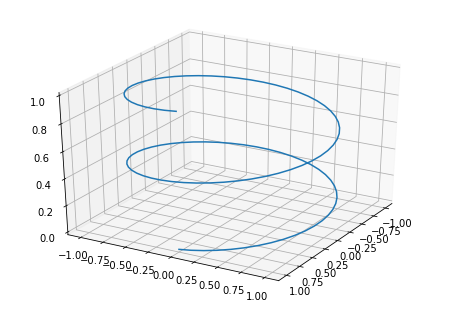

In [31]:
fig = plt.figure()
ax = Axes3D(fig)
ax.elev, ax.azim = 30, 30
ax.plot(x, y, z)
plt.show()

## Поверхности

Все поверхности параметрические: $x=x(u,v)$, $y=y(u,v)$, $z=z(u,v)$. Если мы хотим построить явную поверхность $z=z(x,y)$, то удобно создать массивы $x=u$ и $y=v$ функцией `meshgrid`.

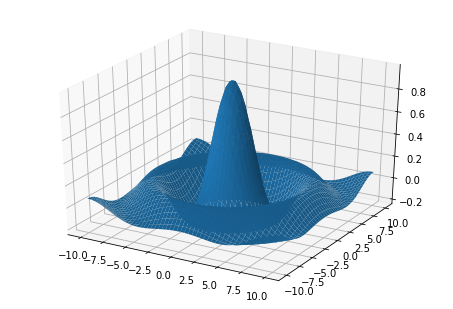

In [33]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1)
plt.show()

Есть много встроенных способов раскраски поверхностей. Так, в методе `gnuplot` цвет зависит от высоты $z$.

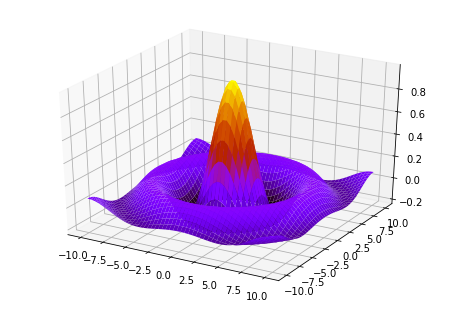

In [34]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
plt.show()

Построим бублик - параметрическую поверхность с параметрами $\vartheta$, $\varphi$.

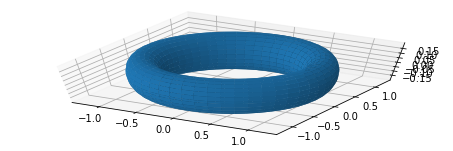

In [35]:
t = np.linspace(0, 2 * np.pi, 50)
th, ph = np.meshgrid(t, t)
r = 0.2
x, y, z = (1 + r * np.cos(ph)) * np.cos(th), (1 + r * np.cos(ph)) * np.sin(th), r * np.sin(ph)

fig = plt.figure()
ax = Axes3D(fig)
ax.elev = 60
ax.set_aspect(0.3)
ax.plot_surface(x, y, z, rstride=2, cstride=1)
plt.show()